# Homework 5 Q2

Up to this point, we have created our own models and practiced implementing existing machine learning techniques and derivations. It is now time to move on to more recent advancements of machine learning–Deep Learning. In this homework, I will demonstrate how PyTorch can be used and some common and useful functionalities. In the end, you will be required to create your own model that will be trained on a dataset.

## PyTorch Tensors

We have made you practice NumPy extensively over the past few weeks: to understand the functions, the dimensions, and the axes. In PyTorch, the package doesn't like to work with NumPy objects. Instead, it works with its own version of NumPy called Torch.Tensors. Torch.Tensor is extremely similar to NumPy and we will show it here.

Let's make a random matrix to play with.

In [ ]:
import torch
import numpy as np

X = torch.rand(5, 8)
X

tensor([[0.0422, 0.0448, 0.8948, 0.7902, 0.2559, 0.3570, 0.1892, 0.2870],
        [0.3642, 0.2277, 0.0925, 0.9121, 0.0974, 0.3724, 0.4538, 0.2913],
        [0.2890, 0.3376, 0.0557, 0.7527, 0.8600, 0.5199, 0.6920, 0.8246],
        [0.1891, 0.5215, 0.7627, 0.8192, 0.3516, 0.9030, 0.8953, 0.7095],
        [0.6324, 0.4177, 0.2659, 0.8095, 0.6406, 0.9730, 0.4028, 0.5828]])

We can easily create the NumPy object of the same tensor using the `.numpy()` method.



In [ ]:
X_np = X.numpy()    # create a NumPy version of X
print(X_np)
print(type(X_np))

[[0.04216897 0.04484457 0.8947944  0.7902157  0.25587273 0.35703415
  0.1892227  0.2870341 ]
 [0.36416262 0.22771466 0.0924536  0.9121479  0.09740376 0.37237638
  0.45384204 0.29127425]
 [0.28895253 0.33761644 0.0556671  0.75266033 0.8600203  0.51992685
  0.69197494 0.824573  ]
 [0.18909848 0.52148306 0.76270735 0.8191613  0.35158575 0.90295446
  0.8953154  0.70945597]
 [0.6323851  0.4176823  0.26591235 0.80947334 0.6405663  0.9730065
  0.4028052  0.58283186]]
<class 'numpy.ndarray'>


And change it back to Torch.Tensor by wrapping it around with torch.tensor().

In [ ]:
X = torch.tensor(X_np)
print(X)
print("Shape:\t", X.shape)
print("X.shape is still represented by a tuple:\t", X.shape == (5, 8))
print("Type:\t", type(X))

tensor([[0.0422, 0.0448, 0.8948, 0.7902, 0.2559, 0.3570, 0.1892, 0.2870],
        [0.3642, 0.2277, 0.0925, 0.9121, 0.0974, 0.3724, 0.4538, 0.2913],
        [0.2890, 0.3376, 0.0557, 0.7527, 0.8600, 0.5199, 0.6920, 0.8246],
        [0.1891, 0.5215, 0.7627, 0.8192, 0.3516, 0.9030, 0.8953, 0.7095],
        [0.6324, 0.4177, 0.2659, 0.8095, 0.6406, 0.9730, 0.4028, 0.5828]])
Shape:	 torch.Size([5, 8])
X.shape is still represented by a tuple:	 True
Type:	 <class 'torch.Tensor'>


Slicing works the same as NumPy as well.

In [ ]:
print(X[1:3, 2:5])      # certain section of the matrix
print(X[[0, 2, 4], :])  # row 0, 2, and 4

tensor([[0.0925, 0.9121, 0.0974],
        [0.0557, 0.7527, 0.8600]])
tensor([[0.0422, 0.0448, 0.8948, 0.7902, 0.2559, 0.3570, 0.1892, 0.2870],
        [0.2890, 0.3376, 0.0557, 0.7527, 0.8600, 0.5199, 0.6920, 0.8246],
        [0.6324, 0.4177, 0.2659, 0.8095, 0.6406, 0.9730, 0.4028, 0.5828]])


Boolean slicing works the same as NumPy as well.

In [ ]:
bool_idx = X < 0.5
print(bool_idx)
X_bool_filter = torch.clone(X)  # torch.clone() can help us deep copy a matrix so we don't accidentally modify the original copy
X_bool_filter[bool_idx] = 99    # using the boolean slicing, we change the values less than 0.5 to 99
print(torch.round(X_bool_filter, decimals=4))
print(X)                        # notice how the original tensor is unchanged, that's why torch.clone() is important

tensor([[ True,  True, False, False,  True,  True,  True,  True],
        [ True,  True,  True, False,  True,  True,  True,  True],
        [ True,  True,  True, False, False, False, False, False],
        [ True, False, False, False,  True, False, False, False],
        [False,  True,  True, False, False, False,  True, False]])
tensor([[99.0000, 99.0000,  0.8948,  0.7902, 99.0000, 99.0000, 99.0000, 99.0000],
        [99.0000, 99.0000, 99.0000,  0.9121, 99.0000, 99.0000, 99.0000, 99.0000],
        [99.0000, 99.0000, 99.0000,  0.7527,  0.8600,  0.5199,  0.6920,  0.8246],
        [99.0000,  0.5215,  0.7627,  0.8192, 99.0000,  0.9030,  0.8953,  0.7095],
        [ 0.6324, 99.0000, 99.0000,  0.8095,  0.6406,  0.9730, 99.0000,  0.5828]])
tensor([[0.0422, 0.0448, 0.8948, 0.7902, 0.2559, 0.3570, 0.1892, 0.2870],
        [0.3642, 0.2277, 0.0925, 0.9121, 0.0974, 0.3724, 0.4538, 0.2913],
        [0.2890, 0.3376, 0.0557, 0.7527, 0.8600, 0.5199, 0.6920, 0.8246],
        [0.1891, 0.5215, 0.7627, 0.8

Of course, we have our favorite mean, var, and std functions.
Now, the only difference between tensors and NumPy is that tensors use the keyword **dim** in place of NumPy's **axis**, like so.

In [ ]:
print(torch.mean(X))
print(torch.var(X))
print(torch.std(X))

tensor(0.4970)
tensor(0.0826)
tensor(0.2875)


In [ ]:
print(torch.mean(X, dim=0))
print(torch.var(X, dim=0))
print(torch.std(X, dim=0))

tensor([0.3034, 0.3099, 0.4143, 0.8167, 0.4411, 0.6251, 0.5266, 0.5390])
tensor([0.0484, 0.0335, 0.1516, 0.0035, 0.0939, 0.0863, 0.0744, 0.0593])
tensor([0.2199, 0.1831, 0.3894, 0.0591, 0.3065, 0.2937, 0.2728, 0.2436])


Some linear algebra operations:


In [ ]:
Z = torch.rand(8, 3)
# dot product - two ways of doing so (NumPy also takes @ for dot products)
print(X @ Z)
print(torch.matmul(X, Z))
print(torch.einsum("ij,jk->ik", [X, Z]))    # this is torch.einsum - not important for this class but a cool function regardless
print((X @ Z).shape)

tensor([[1.5890, 1.8550, 1.5315],
        [1.5012, 1.2931, 1.6021],
        [1.9214, 2.3740, 2.7628],
        [2.4296, 2.7169, 2.6514],
        [2.2293, 2.7036, 2.4991]])
tensor([[1.5890, 1.8550, 1.5315],
        [1.5012, 1.2931, 1.6021],
        [1.9214, 2.3740, 2.7628],
        [2.4296, 2.7169, 2.6514],
        [2.2293, 2.7036, 2.4991]])
tensor([[1.5890, 1.8550, 1.5315],
        [1.5012, 1.2931, 1.6021],
        [1.9214, 2.3740, 2.7628],
        [2.4296, 2.7169, 2.6514],
        [2.2293, 2.7036, 2.4991]])
torch.Size([5, 3])


Calculate eigenvectors and eigenvalues with PyTorch!

In [ ]:
X = torch.rand(4, 4)
print(torch.linalg.eig(X))

torch.return_types.linalg_eig(
eigenvalues=tensor([1.6462+0.0000j, 0.1288+0.1651j, 0.1288-0.1651j, 0.2589+0.0000j]),
eigenvectors=tensor([[-0.6678+0.0000j,  0.3281-0.2648j,  0.3281+0.2648j,  0.0752+0.0000j],
        [-0.5335+0.0000j, -0.3693+0.1010j, -0.3693-0.1010j, -0.2098+0.0000j],
        [-0.3711+0.0000j, -0.1076+0.1635j, -0.1076-0.1635j, -0.1003+0.0000j],
        [-0.3628+0.0000j,  0.7984+0.0000j,  0.7984-0.0000j,  0.9697+0.0000j]]))


## Neural Network 101

Now, we will learn how to create our own neural networks using PyTorch. Our model is still pretty light since this is our first exposure to PyTorch. Next week, we will be learning how to train on models on GPU's to speed up training time!

Firstly, we will mount on Google Drive, so you can access your files from Google Drive like how you would access files from your local computer.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Some standard imports!

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import numpy as np

We will be working with a very popular deep learning dataset Fashion MNIST. Each data point is a 28x28 image of some type of clothes.

In [ ]:
file_path = "/content/drive/MyDrive/"      # ENTER YOUR OWN FILE PATH
data = pd.read_csv(file_path + "fashion_mnist_data.csv", sep=',')
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(data.shape)   # (N, D + 1) (one column is the label column)

(8000, 785)


In the following cell, transform the DataFrame data to 2 NumPy arrays X and y, where X is the data matrix with 784 pixels per row. y should be a NumPy vector of the labels. From the cell above, we see that there are 8,000 samples to work with. Each sample has 784 features, or pixels, where the first column, "label", is the label of that sample. The final shape of X should be `(8000, 784)` and y should be `(8000, )`.

In [ ]:
### YOUR CODE HERE
X = data.iloc[:, 1:].values
X = torch.tensor(X)

y = data.iloc[:, 0].values
y = torch.tensor(y)

# print the shapes of X and y to verify that they match the expected shapes
print(X.shape)
print(y.shape)

torch.Size([8000, 784])
torch.Size([8000])


Let's quickly visualize some samples. You should see some images of clothes and the correct labels if you implemented the above cell correctly.

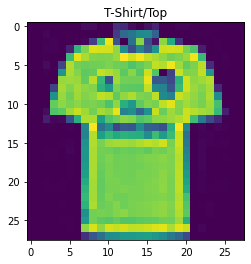

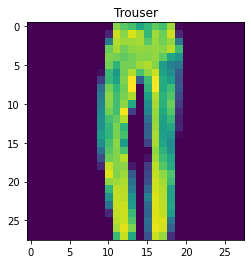

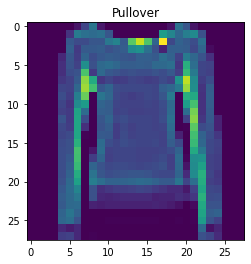

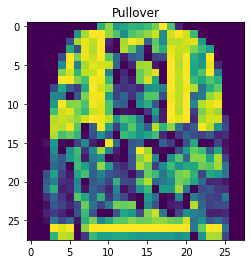

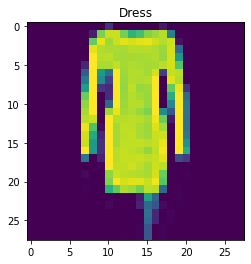

In [ ]:
import matplotlib.pyplot as plt

labels = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]

def show_image_labels(img, label):
    plt.imshow(img.reshape(28, 28))
    plt.title(labels[label])
    plt.show()

for i in range(5):
    show_image_labels(X[i], y[i])

Now, we will build our first neural network!

In [ ]:
class Sample_Network(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO
        input_dim =  784    # what should be the input dimension? what are we feeding the network?
        output_dim = 10    # what should be the output dimension? what do we want from the network after running model(), or also known as model.forward()?
        self.input_layer = nn.Linear(input_dim, 126)
        self.hidden_layer = nn.Linear(126, 256)
        self.output_layer = nn.Linear(256, output_dim)

    # self.forward is the main function that you will run your model with!
    # model(X) is equivalent as model.forward(X).
    # you will see how it's used in just a bit!
    # nothing to implement here - an example of how you the forward method works
    # as you can see, X is first passed into the input layer, then a non-linearity ReLU
    # then, the hidden layer followed by a non-linearity ReLU
    # in the end, the output_layer produces a logit matrix based on how many classes
    # we want it to classify
    def forward(self, X):
        X = self.input_layer(X)
        X = F.relu(X)
        X = self.hidden_layer(X)
        X = F.relu(X)
        logits = self.output_layer(X)
        return logits

    # we will create our own function to help with prediction
    # we will utilize F.softmax and torch.argmax!
    def classify(self, X):
        """
        Q:  create a function classify that will take in X data points and produce
            the predicted classification of these points.

        HINT: use torch.softmax() and torch.argmax()! you NEED them.

        Inputs
        - X: the torch.tensor matrix to be classified with shape (N, D)

        Outputs
        - labels: a torch.tensor with the shape (N, ), each item being X[i]'s 
                  classification prediction
        """
        X = torch.tensor(X).type(torch.float32)     # enforce smooth-running with the model
        logits = self(X)
        probas = torch.softmax(logits, dim=1)  
        labels = torch.argmax(probas, dim=1)
        return labels.type(torch.long)

Write code to transform X and y into Tensors. `X` needs to be of type `torch.float32` and `y` needs to be of type `torch.long`. Google how you can cast a tensor to some certain type with PyTorch.

In [ ]:
### YOUR CODE HERE
X, y = X.to(torch.float32), y.to(torch.long)

Let's instantiate our model and see what the outputs look like! It should look like (2, 10) because we fed in 2 samples and we're classifying one of the 10 possible classes!

In [ ]:
model = Sample_Network()
out = model(X[:2])
print(out)
print(out.shape)

tensor([[ -4.3553,  10.8706,  -6.4679,  -4.2372, -16.2028,   9.7061,  15.8032,
         -27.0474,   4.5441,   3.4725],
        [  3.2048,  -8.5327,  -2.6297,   8.0820, -20.5732,  17.5492,   2.9682,
         -20.5287,   9.9219,  -2.2088]], grad_fn=<AddmmBackward0>)
torch.Size([2, 10])


If we apply softmax to the output, we get the probability distribution of each class!

In [ ]:
preds = model.classify(X[:2])
print(preds)    # the model thinks that the first 2 samples are these classes

tensor([6, 5])


<ipython-input-7-127a37548734>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X).type(torch.float32)     # enforce smooth-running with the model


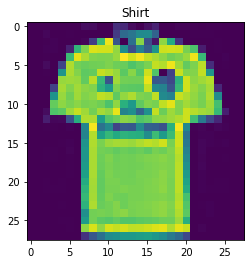

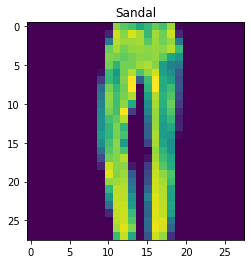

In [ ]:
# let's see if the model is doing a good job
show_image_labels(X[0], preds[0])       # this should be a T-shirt, not a shirt - they are two different classes
show_image_labels(X[1], preds[1])

Technically, the first image is supposed to be a t-shirt, not a shirt, soooo the model got both wrong (if it somehow did it got lucky)... Why? Well, we haven't trained it yet! And that's our next section!

## Writing the Training Loop

This is arguably one of the most important components of Deep Learning and PyTorch. We need to write our own training loop that will repeatedly train our model a number of epochs of times, based on our own specifications.

A typical training loop will have the following structure:


*   Take in the model and the data X_train, y_train, X_val, and y_val.
*   Take in hyperparameters such as learning rate, batch size, optimizer, schedulers, etc.
*   Iterate through the epochs
*   Each epoch, iterate through the batches and keep track of the losses and the metrics of choice (accuracy in our case).

In [ ]:
from sklearn.metrics import accuracy_score

def train(model, X_train, y_train, X_val, y_val, epochs=15, batch_size=32, lr=1e-3):
    """
    Q:  write the training loop following the schema shown above.

    Inputs
    - model: the model to be trained - a PyTorch nn.Module class object
    - X_train, y_train, X_val, y_val: training and validation data
    - epochs: num epochs, or the number of times we want to run through the entire training data
    - batch_size: number of data points per batch
    - lr: learning rate
    - optimizer: optimizer used

    Outputs
    - losses: a list of losses
    - accuracies: a list of validation accuracies
    - train_accs: a list of training accuracies
    """

    batches = len(X_train) // batch_size   # using batch_size, determine the number of batches needed

    loss_fn = nn.CrossEntropyLoss()                             # read the write-up for an explanation on CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)     # read the write-up for an explanation on Adam

    losses = []
    train_accs = []
    accuracies = []

    for epoch in range(epochs):
        for i in range(batches):
            X_batch = X_train[i*batch_size:(i+1)*batch_size]
            y_batch = y_train[i*batch_size:(i+1)*batch_size]

            logits = model(X_batch)

            loss = loss_fn(logits, y_batch)

            # these 3 functions will follow you whenever you train a model with PyTorch
            optimizer.zero_grad()   # erases the gradients from the previous epoch (sets all gradients to 0)
            loss.backward()         # calculates the gradients with respect to every single weight matrix in the model
            optimizer.step()        # takes ONE learning step with the gradients just calculated

        # feel free to use sklearn's accuracy_score function
        # calculate the training accuracy
        accuracy = accuracy_score(y_train, model(X_train).argmax(dim=1))
        train_accs.append(accuracy)

        # calculate the validation accuracy and append the loss of this epoch
        val_acc = accuracy_score(y_val, model(X_val).argmax(dim=1))
        accuracies.append(val_acc)
        losses.append(loss.item())

        # print epoch, loss, and current test accuracy
        print(f"Epoch {epoch}:\tloss {loss} & accuracy {accuracy}")
    
    return losses, accuracies, train_accs

If you implemented the above code `Sample_Network` and `train()` correctly, you should see close to a 0.79-0.80 accuracy.

In [ ]:
model = Sample_Network()
losses, accuracies, train_accs = train(model, X[:7000], y[:7000], X[7000:], y[7000:], epochs=5)

Epoch 0:	loss 1.2680299282073975 & accuracy 0.7371428571428571
Epoch 1:	loss 0.8095451593399048 & accuracy 0.7784285714285715
Epoch 2:	loss 0.9857142567634583 & accuracy 0.7552857142857143
Epoch 3:	loss 0.6301232576370239 & accuracy 0.7774285714285715
Epoch 4:	loss 0.6965112090110779 & accuracy 0.8011428571428572


<ipython-input-7-127a37548734>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X).type(torch.float32)     # enforce smooth-running with the model


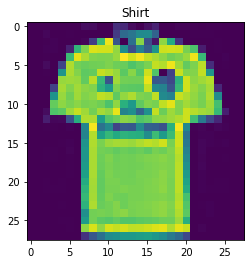

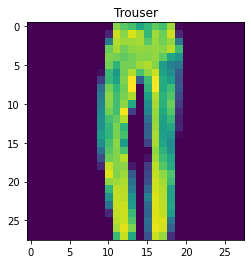

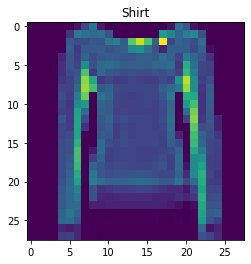

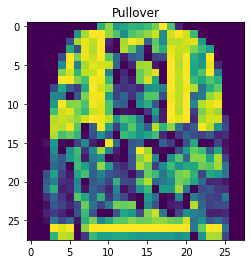

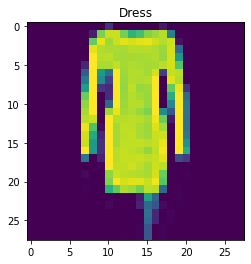

In [ ]:
# Let's see how much the model has learned
preds = model.classify(X[:5])
for i in range(5):
    show_image_labels(X[i], preds[i])

Compared to what we had earlier, the model clearly learned *something*. It is currently able to differentiate among different images of clothes with an 80% accuracy!

## Build Your Own Model

Now, fill in the following class and make your own neural network model that can classify the clothes with a validation accuracy of 90%!

Using the previous `Sample_Network` as an example, please implement `My_Network`, a class that is able to produce `num_layers` of hidden layers (NOT including the input and the output layers) where each hidden layer has `hidden_size` units. Additionally, please **add one or more extra features** to boost your performance. Some inspirations: adding Dropout() layers, Batchnorm() layers, normalize inputs, learning rate schedulers, etc.

When you're done with this section, click on the folder icon to your left (for those using Google Colab), and you should be able to download `my_model.pt` and `predictions.npy` - the 2 files you will submit to Gradescope.

In [109]:
class My_Network(nn.Module):
    def __init__(self, num_layers, hidden_size):
        super().__init__()
        self.input_layer = nn.Linear(784, hidden_size)
        self.hidden_layers = nn.ModuleList([nn.Linear(hidden_size, hidden_size) for i in range(num_layers)])
        self.output_layer = nn.Linear(hidden_size, 10)
        self.batch_norms = nn.ModuleList([nn.BatchNorm1d(hidden_size) for i in range(num_layers)])
        
    def forward(self, X):
        X = self.input_layer(X)
        X = nn.functional.relu(X)
        for layer, batch_norm in zip(self.hidden_layers, self.batch_norms):
            X = layer(X)
            X = batch_norm(X)
            X = nn.functional.relu(X)
        logits = self.output_layer(X)
        return logits

    def classify(self, X):
        X = torch.tensor(X).type(torch.float32)
        logits = self(X)
        probas = nn.functional.softmax(logits, dim=1)  
        labels = torch.argmax(probas, dim=1)
        return labels.type(torch.long)

In [110]:
my_model = My_Network(num_layers=2, hidden_size=128)
losses, accuracies, train_accs = train(my_model, X[:7000], y[:7000], X[7000:], y[7000:], epochs=5)

Epoch 0:	loss 0.92147296667099 & accuracy 0.8237142857142857
Epoch 1:	loss 0.8769670128822327 & accuracy 0.8348571428571429
Epoch 2:	loss 0.7183604836463928 & accuracy 0.866
Epoch 3:	loss 0.6697062849998474 & accuracy 0.863
Epoch 4:	loss 0.6913859844207764 & accuracy 0.8638571428571429


In [111]:
torch.save(my_model.state_dict(), '/content/drive/MyDrive/' + "my_model.pt")       # save your model - do NOT change the name of 
                                                                   # the model or else the autograder won't recognize it!

In [112]:
def get_test_classifications(model, file_path):
    test_df = pd.read_csv(file_path, sep=',')
    X = test_df.values
    X = torch.tensor(X).type(torch.float32)
    out = model.classify(X)
    np.save("predictions.npy", out)
    print("predictions.npy saved!")

get_test_classifications(my_model, "/content/drive/MyDrive/fashion_mnist_test.csv")

predictions.npy saved!


<ipython-input-109-12dcca0718a0>:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X).type(torch.float32)


Graph out your training vs. validation accuracy. These values should be available after running your training loop.

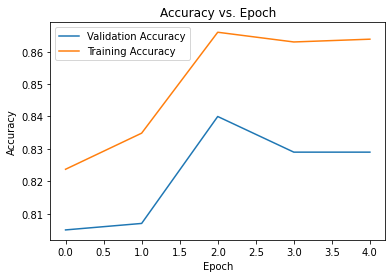

In [113]:
def graph(accuracies, training_accs):
    """
    Q:  graph out the accuracies and training accuracies.
        make sure you label which curve is the validation/training accuracy.
        labels and titles are required.

    Inputs
    - accuracies: list of floats with length epochs
    - training_accs: list of floats with length epochs

    Outputs
    - None
    """
    epochs = len(accuracies)
    plt.plot(range(epochs), accuracies, label='Validation Accuracy')
    plt.plot(range(epochs), training_accs, label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')
    plt.legend()
    plt.show()

graph(accuracies, train_accs)

## Short report


1.   What extra feature did you end up implementing? Why? Did it improve model performance?
2.   What did you observe after plotting the training and validation accuracy? Were there any overfitting or underfitting?


Your response:



1.   I used the BatchNorm1d() function to incorporate batch normalization into my model. Batch normalization reduces the internal covariate shift by normalizing the inputs in each neural network layer. It also helps with reducing overfitting and increasing accuracy. It did help the model performance. Accuracy went up from about 0.73-0.80 to about 0.82-0.86. 
2.   My training and validation accuracy plot clearly showed that there is overfitting. We can see this because there is high training accuracy but low validation accuracy. The larger the gap between the training and validation accuracy, the more likely the model is overfitting. Since there is quite a big gap between the two, we can confidently say that the model is overfitting.




## Conclusion

We have explored the very fundamentals of PyTorch in this homework, and the tools we have currently worked with is only the tip of the iceberg! In our next homework, we will do some heavy convolutional neural networks and learn how we can send our model to the GPU for a dramatically faster training time.